<a href="https://colab.research.google.com/github/Nandita102biswas/main/blob/main/8thsem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


/content/drive/MyDrive/Colab Notebooks/Amloki/Amloki/FRESH
[[194 195 195 ... 160 160 161]
 [194 195 194 ... 161 160 160]
 [194 193 193 ... 161 160 161]
 ...
 [239 240 239 ... 200 198 198]
 [238 239 240 ... 201 199 199]
 [238 239 241 ... 202 199 199]]
(1841, 2454)


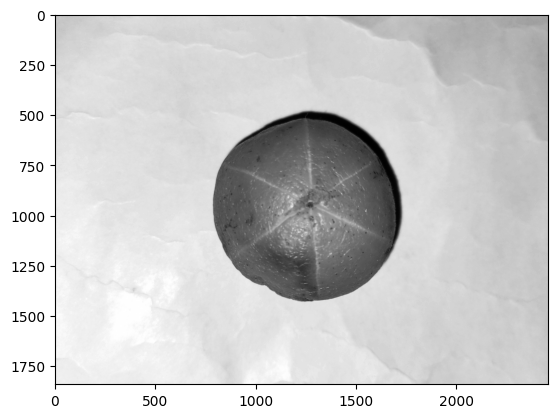

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import cv2


data_dir= r'/content/drive/MyDrive/Colab Notebooks/Amloki/Amloki'
categories= ['FRESH', 'BAD']

for i in categories:
  path= os.path.join(data_dir, i)
  print(path)
  for img in os.listdir(path):
    img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    print(img_array)
    print(img_array.shape)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

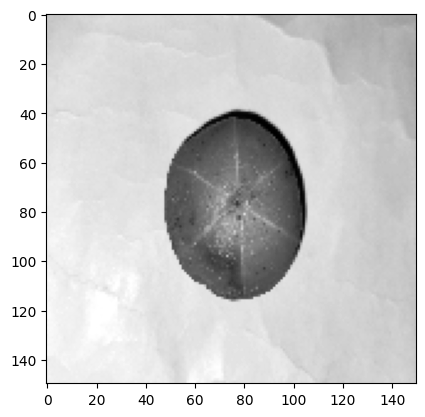

In [4]:
IMG_SIZE=150
new_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
training_data=[]

def create_training_data():
  categories= ['FRESH', 'BAD']
  IMG_SIZE=150
  for i in categories:
    path=os.path.join(data_dir, i)
    class_num=categories.index(i) #fresh=0,bad=1
    print(class_num)
    for img in os.listdir(path):
      try:
        img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()
print(training_data[0:1])

0
1
[[array([[194, 199, 195, ..., 165, 161, 160],
       [196, 197, 198, ..., 162, 160, 160],
       [199, 198, 198, ..., 162, 159, 158],
       ...,
       [239, 244, 239, ..., 207, 205, 201],
       [238, 239, 240, ..., 203, 207, 203],
       [238, 239, 239, ..., 205, 207, 202]], dtype=uint8), 0]]


In [6]:
print(type(training_data),len(training_data))

<class 'list'> 283


In [7]:
import random
random.shuffle(training_data)

In [8]:
for sample in training_data:
  print(sample[1])

0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
1
0
1
0
0
0
1
0
1
0
0
0
1
0
1
1
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
1
1
1
0
1
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
1
0
0
0
0


In [9]:
x=[]
y=[]

for features, label in training_data:
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,IMG_SIZE, IMG_SIZE, 1)


In [10]:
import pickle

pickle_out= open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out= open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [11]:
pickle_in= open("x.pickle", "rb")
x=pickle.load(pickle_in)

In [12]:
x[1]

array([[[213],
        [216],
        [215],
        ...,
        [191],
        [189],
        [186]],

       [[214],
        [216],
        [218],
        ...,
        [189],
        [192],
        [187]],

       [[219],
        [220],
        [220],
        ...,
        [191],
        [192],
        [194]],

       ...,

       [[233],
        [229],
        [232],
        ...,
        [208],
        [207],
        [206]],

       [[229],
        [228],
        [230],
        ...,
        [205],
        [202],
        [202]],

       [[229],
        [231],
        [229],
        ...,
        [205],
        [205],
        [204]]], dtype=uint8)

CNN

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x=pickle.load(open("x.pickle", "rb"))
y=pickle.load(open("y.pickle", "rb"))

In [14]:
x=np.array(x/255.0)
y=np.array(y)

In [15]:
model=Sequential()
model.add(Conv2D(64, (3,3), input_shape=x.shape[1:] ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(x,y, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 22s 3s/step - loss: 2.0927 - accuracy: 0.6106 - val_loss: 0.4715 - val_accuracy: 0.8070
Epoch 2/50
8/8 [==============================] - 20s 2s/step - loss: 0.4836 - accuracy: 0.8009 - val_loss: 0.3285 - val_accuracy: 0.8421
Epoch 3/50
8/8 [==============================] - 18s 2s/step - loss: 0.4374 - accuracy: 0.7965 - val_loss: 0.3334 - val_accuracy: 0.8421
Epoch 4/50
8/8 [==============================] - 17s 2s/step - loss: 0.2924 - accuracy: 0.8540 - val_loss: 0.2385 - val_accuracy: 0.8947
Epoch 5/50
8/8 [==============================] - 17s 2s/step - loss: 0.2413 - accuracy: 0.8717 - val_loss: 0.2353 - val_accuracy: 0.8947
Epoch 6/50
8/8 [==============================] - 17s 2s/step - loss: 0.2652 - accuracy: 0.9027 - val_loss: 0.1796 - val_accuracy: 0.9298
Epoch 7/50
8/8 [==============================] - 18s 2s/step - loss: 0.1782 - accuracy: 0.9248 - val_loss: 0.2464 - val_accuracy: 0.8772
Epoch 8/50
8/8 [==================

In [16]:
model.evaluate(x,y)#training accuracy

9/9 [==============================] - 5s 534ms/step - loss: 0.0423 - accuracy: 0.9929


[0.04229328781366348, 0.9929328560829163]

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      640       
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [18]:
model.save('AmlokiA.h5')

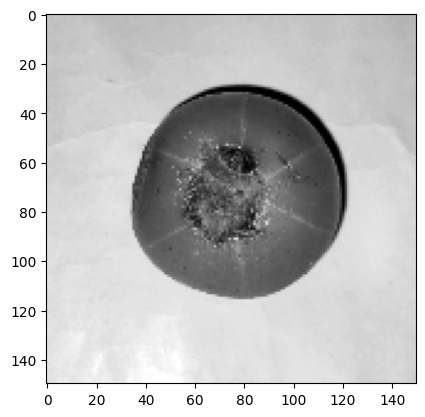

1/1 [==============================] - 0s 144ms/step
Our model tells that the amla is  Fresh


In [19]:
idx2=random.randint(0,len(y))
plt.imshow(x[idx2, :],'gray')
plt.show()
y_pred=model.predict(x[idx2, :].reshape(-1,IMG_SIZE, IMG_SIZE, 1))
y_pred = y_pred > 0.5
if(y_pred==0):
  pred= 'Fresh'
else :
 pred='Bad'
print("Our model tells that the amla is ",pred)  


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [21]:
x_train.shape

(226, 150, 150, 1)

In [22]:
y_train.shape

(226,)

In [23]:
y_test.shape

(57,)

In [24]:
x_test.shape

(57, 150, 150, 1)

In [25]:
x_train[1]

array([[[0.72941176],
        [0.7254902 ],
        [0.72941176],
        ...,
        [0.61176471],
        [0.60784314],
        [0.60784314]],

       [[0.74117647],
        [0.74901961],
        [0.75294118],
        ...,
        [0.61568627],
        [0.60392157],
        [0.61568627]],

       [[0.75294118],
        [0.76078431],
        [0.76470588],
        ...,
        [0.62352941],
        [0.62352941],
        [0.62352941]],

       ...,

       [[0.9254902 ],
        [0.91764706],
        [0.91372549],
        ...,
        [0.76078431],
        [0.76862745],
        [0.76470588]],

       [[0.92156863],
        [0.91764706],
        [0.92941176],
        ...,
        [0.76470588],
        [0.76078431],
        [0.76862745]],

       [[0.91372549],
        [0.91372549],
        [0.92156863],
        ...,
        [0.77254902],
        [0.76078431],
        [0.76078431]]])

In [26]:
scores= model.evaluate(x_train,y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.56%


In [27]:
model_details= model.fit(x_train, y_train, batch_size=128, epochs= 5, validation_data= (x_test, y_test), verbose=1)

Epoch 1/5
2/2 [==============================] - 20s 8s/step - loss: 0.0201 - accuracy: 0.9956 - val_loss: 0.1331 - val_accuracy: 0.9825
Epoch 2/5
2/2 [==============================] - 24s 9s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1327 - val_accuracy: 0.9825
Epoch 3/5
2/2 [==============================] - 17s 9s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1344 - val_accuracy: 0.9825
Epoch 4/5
2/2 [==============================] - 16s 8s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1337 - val_accuracy: 0.9825
Epoch 5/5
2/2 [==============================] - 16s 7s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1320 - val_accuracy: 0.9825


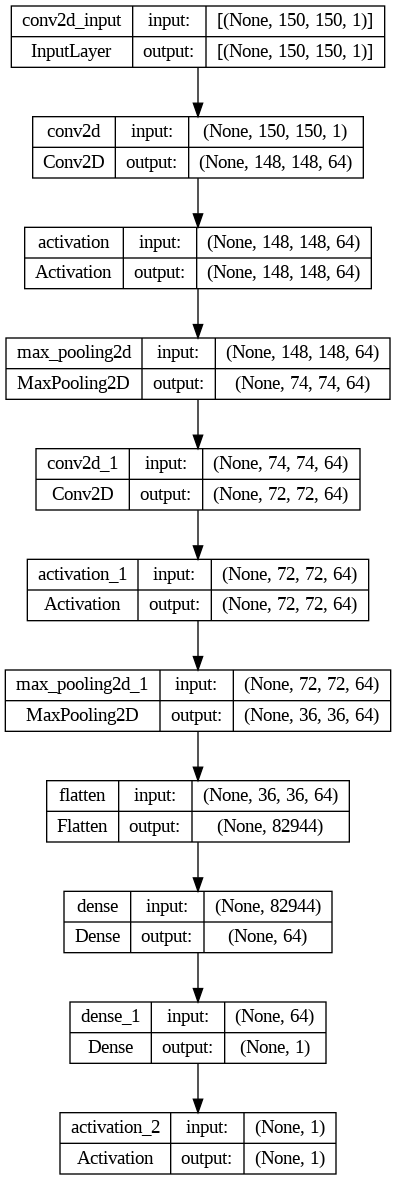

In [28]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      640       
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [30]:
from keras.models import load_model

classifier = load_model('AmlokiA.h5')
y_pred=classifier.predict(x_test)

2/2 [==============================] - 1s 586ms/step


In [31]:
y_pred

array([[6.2637910e-02],
       [6.9489343e-09],
       [4.5882143e-06],
       [1.0423168e-09],
       [1.0000000e+00],
       [6.3399020e-14],
       [1.1848529e-05],
       [5.2983273e-06],
       [9.9988192e-01],
       [9.9604720e-01],
       [9.8029277e-06],
       [6.5338972e-04],
       [1.2737594e-10],
       [2.7611915e-07],
       [1.3877705e-10],
       [2.5842316e-03],
       [4.9767947e-11],
       [7.5721243e-07],
       [4.6558510e-10],
       [7.2582094e-05],
       [1.8444669e-05],
       [4.4130177e-10],
       [1.9855263e-05],
       [1.5700632e-06],
       [9.9885243e-01],
       [1.6334514e-09],
       [3.7034388e-05],
       [9.9999982e-01],
       [1.0053791e-09],
       [1.1735120e-03],
       [5.0555298e-04],
       [1.5114000e-11],
       [9.9715269e-01],
       [5.8119960e-11],
       [1.1026822e-08],
       [1.0000000e+00],
       [3.3587728e-09],
       [2.8377185e-09],
       [2.7310652e-12],
       [2.0913519e-06],
       [9.8792589e-01],
       [8.768255

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
roc_auc= roc_auc_score(y_test, y_pred)
roc_auc

0.9888888888888889

In [33]:
np.array(np.unique(y_test, return_counts= True)).T

array([[ 0, 45],
       [ 1, 12]])

In [34]:
np.array(np.unique(y_pred, return_counts= True)).T

array([[6.33990202e-14, 1.00000000e+00],
       [8.76825576e-13, 1.00000000e+00],
       [2.73106516e-12, 1.00000000e+00],
       [4.46989754e-12, 1.00000000e+00],
       [1.46249818e-11, 1.00000000e+00],
       [1.51140003e-11, 1.00000000e+00],
       [2.29538871e-11, 1.00000000e+00],
       [4.97679467e-11, 1.00000000e+00],
       [5.81199602e-11, 1.00000000e+00],
       [1.27375943e-10, 1.00000000e+00],
       [1.38777045e-10, 1.00000000e+00],
       [3.03411934e-10, 1.00000000e+00],
       [4.41301773e-10, 1.00000000e+00],
       [4.65585098e-10, 1.00000000e+00],
       [1.00537911e-09, 1.00000000e+00],
       [1.04231679e-09, 1.00000000e+00],
       [1.63345137e-09, 1.00000000e+00],
       [2.83771850e-09, 1.00000000e+00],
       [3.35877282e-09, 1.00000000e+00],
       [4.77616524e-09, 1.00000000e+00],
       [6.94893432e-09, 1.00000000e+00],
       [1.10268221e-08, 1.00000000e+00],
       [3.03191818e-08, 1.00000000e+00],
       [4.30505125e-08, 1.00000000e+00],
       [2.761191

In [35]:
np.array(np.unique(y_train, return_counts= True)).T

array([[  0, 177],
       [  1,  49]])

In [36]:
y_train=y_train>=0.5
np.array(np.unique(y_train, return_counts= True)).T

array([[  0, 177],
       [  1,  49]])

In [37]:
y_test=y_test.astype('int64')

In [38]:
y_pred=y_pred>=0.5
accuracy_score(y_test, y_pred, normalize=False)

56

In [39]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[45  0]
 [ 1 11]]


In [40]:
print(metrics.confusion_matrix(y_train, y_train))

[[177   0]
 [  0  49]]


In [41]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.92      0.96        12

    accuracy                           0.98        57
   macro avg       0.99      0.96      0.97        57
weighted avg       0.98      0.98      0.98        57



In [42]:
y_train_pred=classifier.predict(x_train)

8/8 [==============================] - 5s 619ms/step


In [ ]:
y_train=y_train.astype('int64')

In [ ]:
model_details.history??

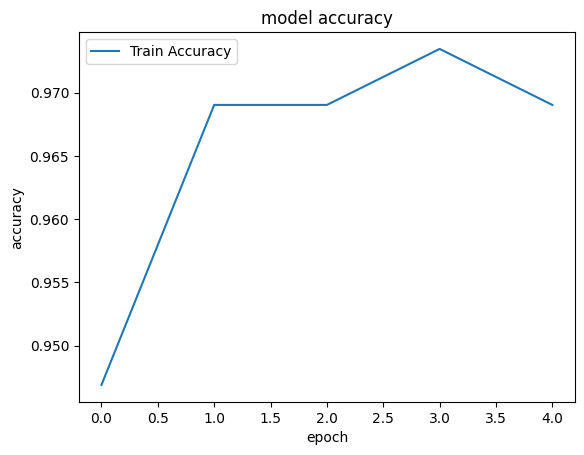

In [ ]:
plt.plot(model_details.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy'], loc= 'upper left')
plt.show()

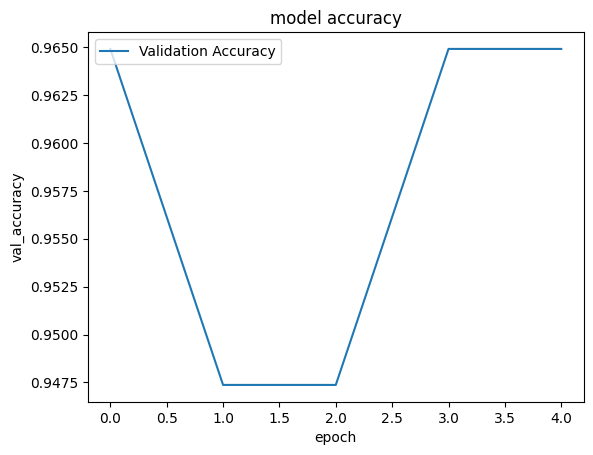

In [ ]:
plt.plot(model_details.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['Validation Accuracy'], loc= 'upper left')
plt.show()

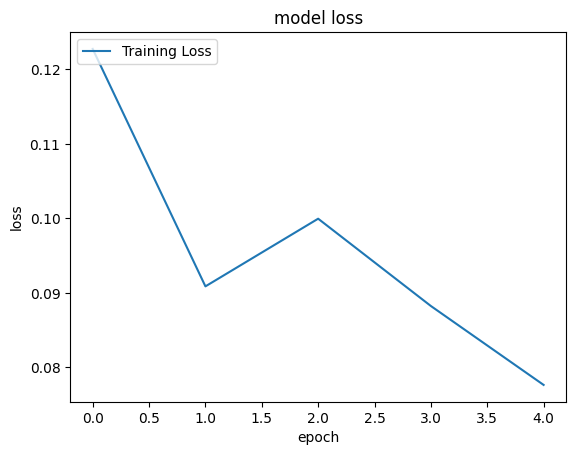

In [ ]:
plt.plot(model_details.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss'], loc= 'upper left')
plt.show()

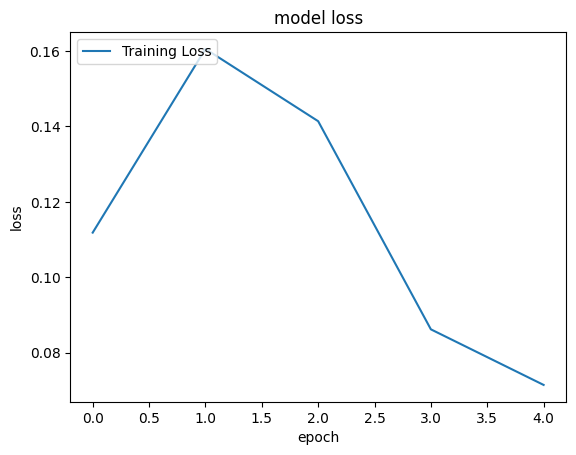

In [ ]:
plt.plot(model_details.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss'], loc= 'upper left')
plt.show()

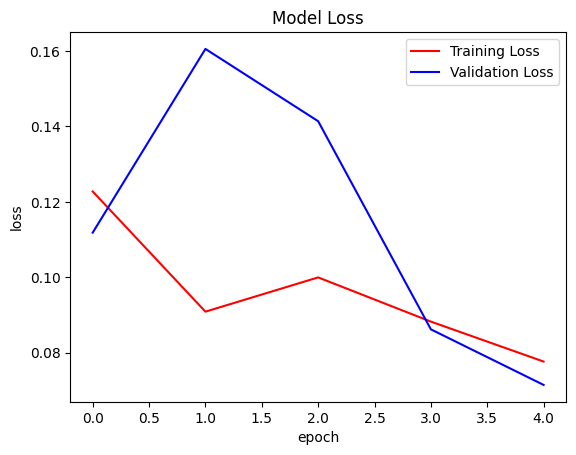

In [ ]:
loss_train = model_details.history['loss']
loss_val = model_details.history['val_loss']
plt.plot(loss_train, 'r')
plt.plot(loss_val, 'b')
plt.title("Model Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training Loss', 'Validation Loss'], loc= 'upper right')
plt.show()


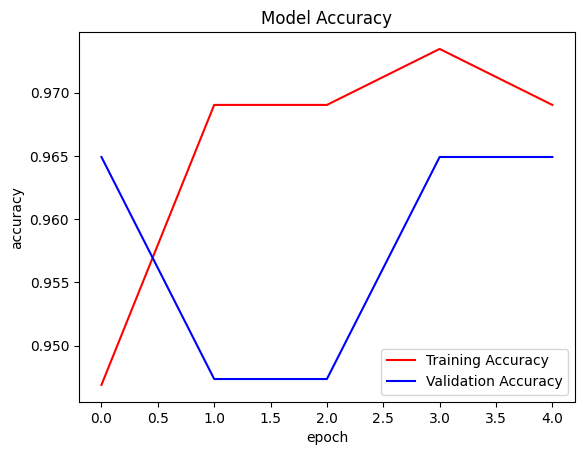

In [ ]:
acc_train = model_details.history['accuracy']
acc_val = model_details.history['val_accuracy']
#epochs = range(1,50)
plt.plot(acc_train, 'r')
plt.plot(acc_val, 'b')
plt.title("Model Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc= 'lower right')
plt.show()

In [ ]:
history_dict = model_details.history
print(history_dict.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
